# import包

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/poteman/AnacondaInstall/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution
/Users/poteman/AnacondaInstall/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython import display

display.set_matplotlib_formats('svg')

# 高清图像

In [3]:
import matplotlib.pyplot as plt #支持中文

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False#用来正常显示负号

# 读取数据

In [4]:
train = pd.read_csv('../input/application_train.csv')

In [5]:
train.shape

(307511, 122)

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
target = 'TARGET'

# 标签分布

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


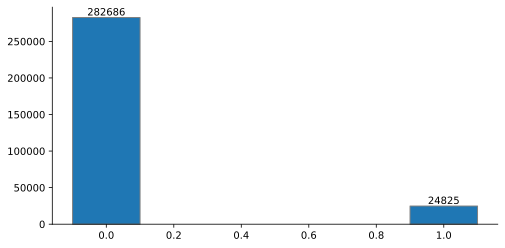

In [8]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(8,4), dpi=100)

y_data = list(train[target].value_counts().values)
x_data = list(train[target].value_counts().index)

# 柱状图
bar = plt.bar(x_data, y_data, 0.2, edgecolor='grey')

# 显示数据标签
for a,b in zip(x_data, y_data):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
    
# 边框隐藏
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 缺失值

In [9]:
def missing_values_table(df):
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Number of Missing Values', 1 : 'Percent of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Percent of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(train)
missing_values.head(5)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Number of Missing Values,Percent of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


# 异常值

In [11]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [12]:
train.loc[train['DAYS_EMPLOYED'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [13]:
train.loc[train['DAYS_EMPLOYED']>365242]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


# 相关性

In [14]:
correlations = train.corr()['TARGET'].sort_values()

In [15]:
print('正相关最大的五个特征:\n', correlations.tail(5))
print()
print('负相关最大的五个特征:\n', correlations.head(5))

正相关最大的五个特征:
 DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

负相关最大的五个特征:
 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


In [16]:
abs_correlations = abs(correlations).sort_values(ascending = False)
abs_correlations.head(6)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
Name: TARGET, dtype: float64

## 相关性热力图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


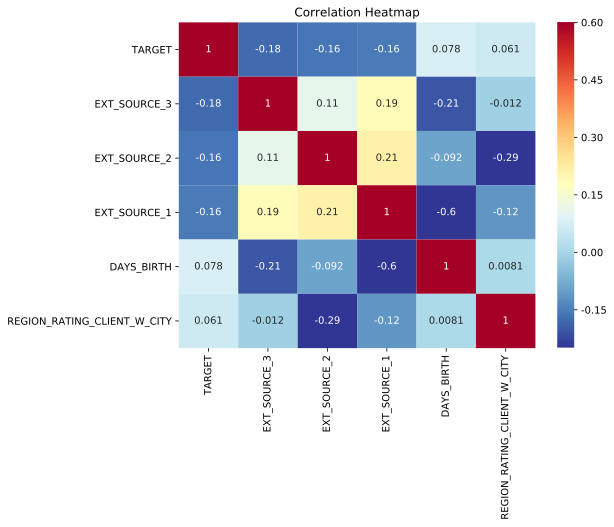

In [17]:
ext_data_corrs = train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
                        'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');